<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


*   Visualize the distribution of data.

*   Visualize the relationship between two features.

*   Visualize composition of data.

*   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [56]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2021-06-22 10:16:16--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite.1’

m4_survey_data.sqli 100%[===================>]  34.98M  46.1MB/s    in 0.8s    

2021-06-22 10:16:17 (46.1 MB/s) - ‘m4_survey_data.sqlite.1’ saved [36679680/36679680]



Connect to the database.


In [57]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [58]:
import pandas as pd

## Demo: How to run an sql query


In [6]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [5]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [ ]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

## Demo: How to describe a table


In [6]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


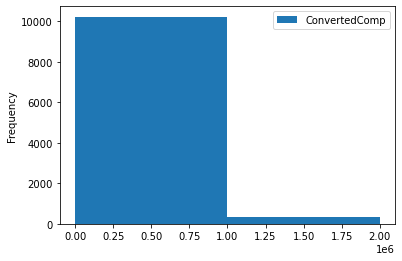

In [9]:
# your code goes here
import matplotlib.pyplot as plt
%matplotlib inline

QUERY_1 = """
SELECT ConvertedComp
From master
"""

ConvertedComp = pd.read_sql_query(QUERY_1, conn)
ConvertedComp.plot(kind = 'hist', bins = 2)

### Box Plots


Plot a box plot of `Age.`


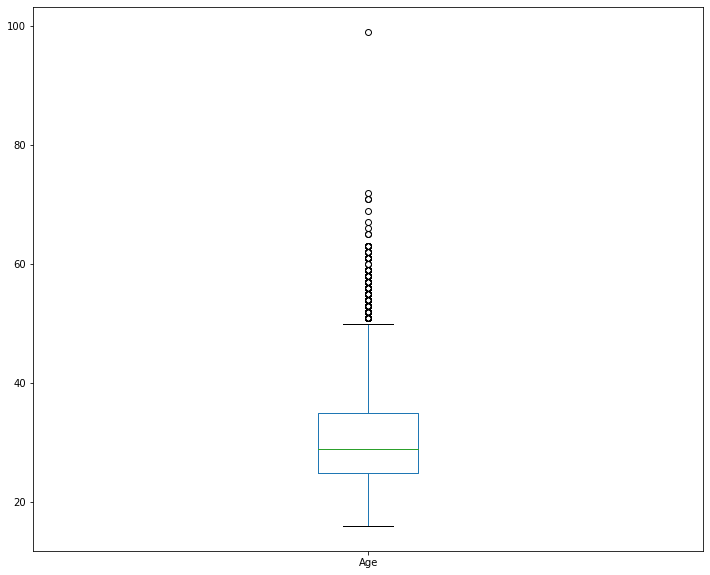

In [32]:
# your code goes here

QUERY_2 = """
SELECT Age
FROM master
"""
Age = pd.read_sql_query(QUERY_2, conn)
Age.plot(kind = 'box', figsize = (12, 10))

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


Text(0.5, 1.0, 'Age against WorkWeekHrs columns')

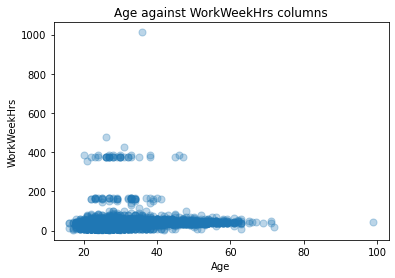

In [65]:
# your code goes here

QUERY_3 = """
SELECT Age 
FROM master
"""

QUERY_4 = """
SELECT WorkWeekHrs
FROM master
"""

QUERY_5 = """
SELECT Age, WorkWeekHrs
FROM master
"""

Age = pd.read_sql_query(QUERY_3, conn)
WorkWeekHrs = pd.read_sql_query(QUERY_4, conn)
Age_Work = pd.read_sql_query(QUERY_5, conn)
plt.scatter(x = Age, y = WorkWeekHrs, alpha = 0.3, marker = '.', s = 200)
plt.xlabel('Age')
plt.ylabel('WorkWeekHrs')
plt.title('Age against WorkWeekHrs columns')

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


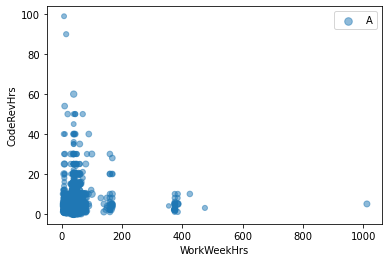

In [78]:
# your code goes here

QUERY_6 = """
SELECT WorkWeekHrs
FROM master
"""

QUERY_7 = """
SELECT CodeRevHrs
FROM master
"""

QUERY_8 = """
SELECT WorkWeekHrs, CodeRevHrs
FROM master
"""

WorkWeekHrs = pd.read_sql_query(QUERY_6, conn)
CodeRevHrs = pd.read_sql_query(QUERY_7, conn)
Work_Code = pd.read_sql_query(QUERY_8, conn)
plt.scatter(x = WorkWeekHrs, y = CodeRevHrs, s = Age, alpha = 0.5)
plt.xlabel('WorkWeekHrs')
plt.ylabel('CodeRevHrs')
plt.legend('Age')

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


([<matplotlib.patches.Wedge at 0x7f51d6217350>,
 [Text(1.3910550797190209, 1.0782234300866909, 'SQLite'),
  Text(-1.0640539347744835, 1.4019234015776112, 'Redis'),
  Text(-0.7177557265348201, -1.6069930668881163, 'PostgreSQL'),
  Text(1.4060870933355027, -1.0585457410784467, 'Other(s):'),
  Text(1.7114627111687621, -0.410481897626279, 'Oracle')],
 [Text(0.7587573162103749, 0.5881218709563768, '21.0%'),
  Text(-0.5803930553315364, 0.764685491769606, '28.7%'),
  Text(-0.3915031235644473, -0.8765416728480633, '37.3%'),
  Text(0.7669565963648196, -0.577388586042789, '5.6%'),
  Text(0.933525115182961, -0.22389921688706124, '7.5%')])

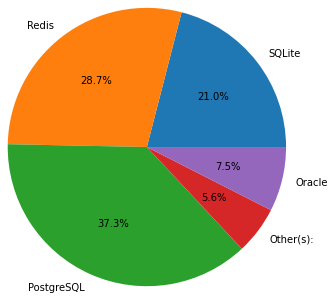

In [94]:
# your code goes here

QUERY_9 = """
SELECT DatabaseDesireNextYear, Count(*) as count
FROM DatabaseDesireNextYear
GROUP BY DatabaseDesireNextYear
ORDER BY DatabaseDesireNextYear DESC LIMIT 5
"""

DatabaseDesireNextYear = pd.read_sql_query(QUERY_9, conn)
x = DatabaseDesireNextYear['count']
label = DatabaseDesireNextYear['DatabaseDesireNextYear']
plt.pie(x, labels = label, autopct = '%1.1f%%', radius = 1.6)

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


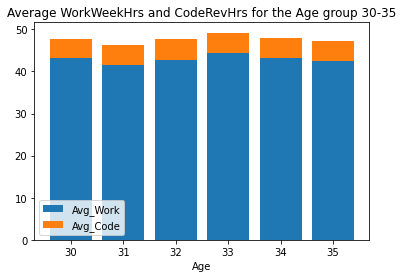

In [16]:
# your code goes here

QUERY_10 = """
SELECT AVG(WorkWeekHrs), AVG(CodeRevHrs), Age
FROM master
WHERE Age BETWEEN 30 AND 35
GROUP BY Age
"""

query = pd.read_sql_query(QUERY_10, conn)
Avg_Work = query['AVG(WorkWeekHrs)']
Avg_Code = query['AVG(CodeRevHrs)']
Age = query['Age']

fig, ax = plt.subplots()

ax.bar(Age, Avg_Work, label = 'Avg_Work')
ax.bar(Age, Avg_Code, bottom = Avg_Work, label = 'Avg_Code')
ax.set_xlabel('Age')
ax.set_title('Average WorkWeekHrs and CodeRevHrs for the Age group 30-35')
ax.legend()
plt.show()

([<matplotlib.patches.Wedge at 0x7f01333fd850>,
 [Text(1.615234756568364, 0.3369223666863609, 'WebAssembly'),
  Text(1.4975732811951146, 0.6926573954347838, 'VBA'),
  Text(0.8110785929624434, 1.4368895281259668, 'TypeScript'),
  Text(-0.4264648978403419, 1.5939346570389976, 'Swift'),
  Text(-0.8825633258370745, 1.394124089128153, 'Scala'),
  Text(-1.6340278336861778, 0.22902628394762403, 'SQL'),
  Text(-1.1229207491342457, -1.2089454045422334, 'Rust'),
  Text(-0.6017466624186949, -1.5363596435301083, 'Ruby'),
  Text(-0.1593260522302756, -1.6422896239947191, 'R'),
  Text(1.1831813396848947, -1.1500356157186866, 'Python')],
 [Text(0.8810371399463802, 0.18377583637437864, '6.5%'),
  Text(0.8168581533791532, 0.37781312478260926, '0.7%'),
  Text(0.4424065052522418, 0.7837579244323454, '19.2%'),
  Text(-0.23261721700382282, 0.8694189038394531, '5.5%'),
  Text(-0.48139817772931326, 0.7604313213426288, '4.1%'),
  Text(-0.8912879092833695, 0.12492342760779492, '23.5%'),
  Text(-0.61250222680049

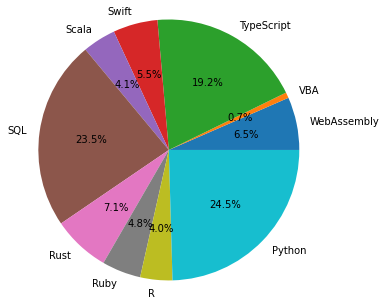

In [32]:
#Question 2 - In the list of most popular languages respondents wish to learn next year, what is the rank of Python?

QUERY_11 = """

SELECT LanguageDesireNextYear, Count(*) as Count
FROM LanguageDesireNextYear
GROUP BY LanguageDesireNextYear
ORDER BY LanguageDesireNextYear DESC LIMIT 10
"""

LanguageDesireNextYear = pd.read_sql_query(QUERY_11, conn)
data = LanguageDesireNextYear['Count']
label = LanguageDesireNextYear['LanguageDesireNextYear']

plt.pie(data, labels = label, autopct = '%1.1f%%', radius = 1.5)

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


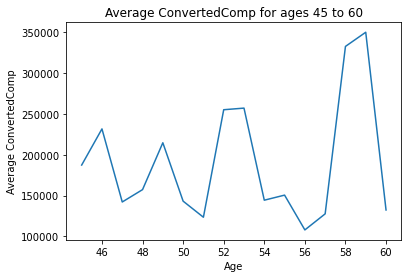

In [59]:
# your code goes here

QUERY_12 = """
SElECT AVG(ConvertedComp), Age
FROM master
WHERE Age BETWEEN 45 AND 60
GROUP BY Age
"""

Avg_Comp_Age = pd.read_sql_query(QUERY_12, conn)
plt.plot(Avg_Comp_Age['Age'], Avg_Comp_Age['AVG(ConvertedComp)'])
plt.xlabel('Age')
plt.ylabel('Average ConvertedComp')
plt.title('Average ConvertedComp for ages 45 to 60')
plt.show()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


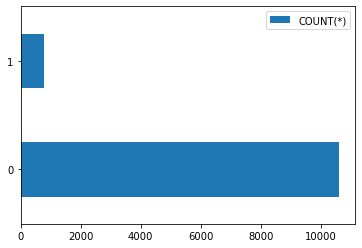

In [53]:
# your code goes here

QUERY_13 = """
SELECT MainBranch, COUNT(*)
FROM master
GROUP BY MainBranch
"""

Main_Branch = pd.read_sql_query(QUERY_13, conn)
Main_Branch.plot(kind = 'barh')

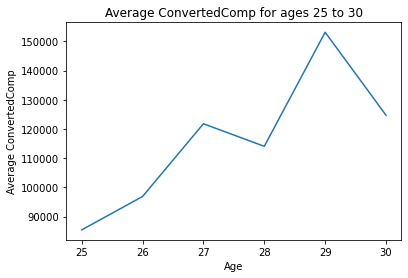

In [61]:
#Based on the Line Chart of Age and median ConvertedComp for the age group 25-30, what kind of correlation do you see between Age and median ConvertedComp?

QUERY_14 = """
SElECT AVG(ConvertedComp), Age
FROM master
WHERE Age BETWEEN 25 AND 30
GROUP BY Age
"""

Comp_Age = pd.read_sql_query(QUERY_14, conn)
plt.plot(Comp_Age['Age'], Comp_Age['AVG(ConvertedComp)'])
plt.xlabel('Age')
plt.ylabel('Average ConvertedComp')
plt.title('Average ConvertedComp for ages 25 to 30')
plt.show()

Close the database connection.


In [62]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer\&utm_source=Exinfluencer\&utm_content=000026UJ\&utm_term=10006555\&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2021-01-01\&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264\&cm_mmca1=000026UJ\&cm_mmca2=10006555\&cm_mmca3=M12345678\&cvosrc=email.Newsletter.M12345678\&cvo_campaign=000026UJ).
